図14.6

In [1]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [2]:
#マスーばねーダンパシステムの定義
M = 1.0
D = 5.0
K = 6.0
A = np.array([[0.0, 1.0], [-K/M,-D/M]]) #行列A
b = np.array([[0.0], [1/M]]) #ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd

In [3]:
#評価関数の重みQとRを与える
Q1 = np.diag([13, 1])
R1 = np.eye(1)
f_lqr1, P1, E1 = matlab.lqr(A, b, Q1, R1) #リカッチ方程式を解く
print("Solution of Riccati Eq. is", P1)
print("Solution of Riccati Eq. is", f_lqr1)

Solution of Riccati Eq. is [[7.04051835 1.        ]
 [1.         0.29150262]]
Solution of Riccati Eq. is [[1.         0.29150262]]


In [4]:
poles1 = [-3.0, -3.0] #閉ループシステムの極の指定
f1 = matlab.acker(A, b, poles1) #フィードバックゲインを求める
print("feedback gain =", f1) #フィードバックゲインの表示

feedback gain = [[3. 1.]]


In [5]:
#評価関数の重みQとRを与える
Q2 = np.diag([1, 1])
R2 = 3*np.eye(1)
f_lqr2, P2, E2 = matlab.lqr(A, b, Q2, R2) #リカッチ方程式を解く
print("Solution of Riccati Eq. is", P2)
print("Solution of Riccati Eq. is", f_lqr2)

Solution of Riccati Eq. is [[1.11599644 0.08314132]
 [0.08314132 0.11617835]]
Solution of Riccati Eq. is [[0.02771377 0.03872612]]


In [6]:
Af1 = A - b*f1 #Af = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

sys_s_fbk1 = matlab.ss(Af1, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_fbk1, t_s_fbk1) = matlab.initial(sys_s_fbk1, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

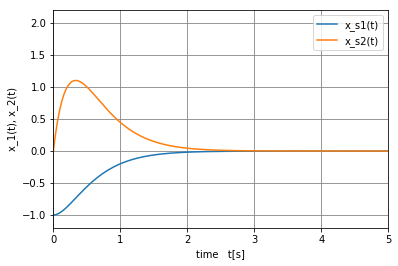

In [7]:
# 図14.6(a)の描画
plt.plot(t_s_fbk1, y_s_fbk1[:,0], label = "x_s1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_s_fbk1, y_s_fbk1[:,1], label = "x_s2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 2.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_1(t), x_2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

In [8]:
Af_lqr1 = A - b*f_lqr1 #リカッチ方程式より求めたフィードバックゲインによるAf = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

sys_s_f_lqr1 = matlab.ss(Af_lqr1, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_f_lqr1, t_s_f_lqr1) = matlab.initial(sys_s_f_lqr1, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

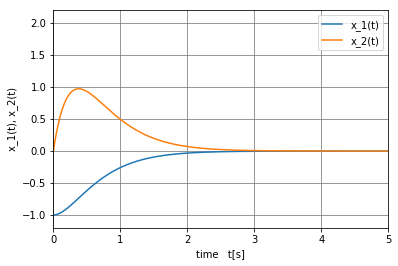

In [9]:
# 図14.6(b)の描画
plt.plot(t_s_f_lqr1, y_s_f_lqr1[:,0], label = "x_1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_s_f_lqr1, y_s_f_lqr1[:,1], label = "x_2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 2.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_1(t), x_2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

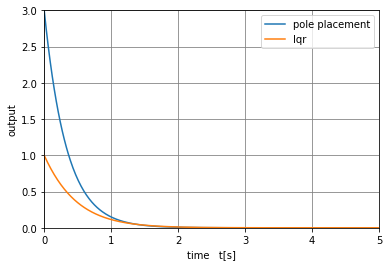

In [10]:
#図14.6(c)の描画
u_pole = - f1[:,0]*y_s_fbk1[:,0] - f1[:,1]*y_s_fbk1[:,1] #極配置の場合の入力の計算
u_lqr1 = - f_lqr1[:,0]*y_s_f_lqr1[:,0] - f_lqr1[:,1]*y_s_f_lqr1[:,1] #最適制御の場合の入力の計算（r=の場合）

plt.plot(t_s_fbk1, u_pole.T, label = "pole placement")
plt.plot(t_s_f_lqr1, u_lqr1.T, label = "lqr")
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([0, 3]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

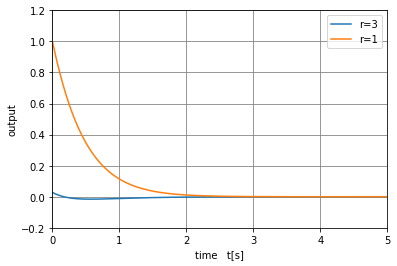

In [11]:
# 図14.6(d)の描画
Af_lqr2 = A - b*f_lqr2
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにCを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてDは零ベクトルとする
sys_s_f_lqr2 = matlab.ss(Af_lqr2, b, cp, dp)
(y_s_f_lqr2, t_s_f_lqr2) = matlab.initial(sys_s_f_lqr2, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01))

u_lqr2 = - f_lqr2[:,0]*y_s_f_lqr2[:,0] - f_lqr2[:,1]*y_s_f_lqr2[:,1] #最適制御の場合の入力の計算（r=3の場合）

plt.plot(t_s_f_lqr2, u_lqr2.T, label = "r=3")
plt.plot(t_s_f_lqr1, u_lqr1.T, label = "r=1")
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-0.2, 1.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]")#横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示